# PCA - TEMEL BİLEŞEN ANALİZİ  (Principal Component Analysis)

Teorik Anlatım Örneği

## Clustering with PCA  
Ülkeleri Mutluluk Skorlarına Göre Kümelere Ayırma Örneği

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import scale
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (8,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("World Happiness 2015-2019.csv")
df.head()

,Overall rank,Year,Country,Region,Score,GDP,Social_Support,Health_life_expectancy,Freedom_to_choices,Generosity,Perceptions_of_corruption
0,1,2015,Switzerland,Western Europe,7.587,1.397,1.350,0.941,0.666,0.297,0.420
1,2,2015,Iceland,Western Europe,7.561,1.302,1.402,0.948,0.629,0.436,0.141
2,3,2015,Denmark,Western Europe,7.527,1.325,1.361,0.875,0.649,0.341,0.484
3,4,2015,Norway,Western Europe,7.522,1.459,1.331,0.885,0.670,0.347,0.365
4,6,2015,Finland,Western Europe,7.406,1.290,1.318,0.889,0.642,0.234,0.414


In [3]:
# Analizde kuLlanılacak feature'ları belirten bir degisken olusturalım

features = ["GDP","Social_Support","Health_life_expectancy","Freedom_to_choices", "Generosity", "Perceptions_of_corruption"]

In [4]:
#veri tiplerini float olarak duzenleyelim

df[features] = df[features].astype("float")

In [5]:
#overaL_rank (ülkenin genel sıralaması ) degerlerini integer yapalım

df["Overall rank"] = df["Overall rank"].astype("int")

In [6]:
# Country degerlerini categoric data yapalım

df["Country"] = df["Country"].astype("category")

In [7]:
#data setindeki region kategorisi null degerler içerdiği ve kullanılmayacağı için düşürelim
df= df.drop(columns=['Region'])

In [8]:
df.dtypes

Overall rank                    int32
Year                            int64
Country                      category
Score                         float64
GDP                           float64
Social_Support                float64
Health_life_expectancy        float64
Freedom_to_choices            float64
Generosity                    float64
Perceptions_of_corruption     float64
dtype: object

In [9]:
df.isnull().sum()

Overall rank                 0
Year                         0
Country                      0
Score                        0
GDP                          0
Social_Support               0
Health_life_expectancy       0
Freedom_to_choices           0
Generosity                   0
Perceptions_of_corruption    1
dtype: int64

In [10]:
df = df.dropna(subset=['Perceptions_of_corruption'])

In [11]:
# tekrar kontrol edelim ve null deger yok

df.isnull().sum()

Overall rank                 0
Year                         0
Country                      0
Score                        0
GDP                          0
Social_Support               0
Health_life_expectancy       0
Freedom_to_choices           0
Generosity                   0
Perceptions_of_corruption    0
dtype: int64

In [12]:
# overall_rank değerlerini baz aLarok üLkeLeri 5 kategoriye ayıralım

category = pd.qcut(df["Overall rank"], 5, labels=[ "Very Top Rank","Top rank","Middle Rank","Low Rank","Very Low Rank"])

In [13]:
# df içinde bulunan ülkelerin ait oLdukları kategoriLeri class degiskenine atayalım

df["class"] = category

## Scaling

In [14]:
# DeğişkenLeri scale yapalım

df_scaled = scale(df[features ])

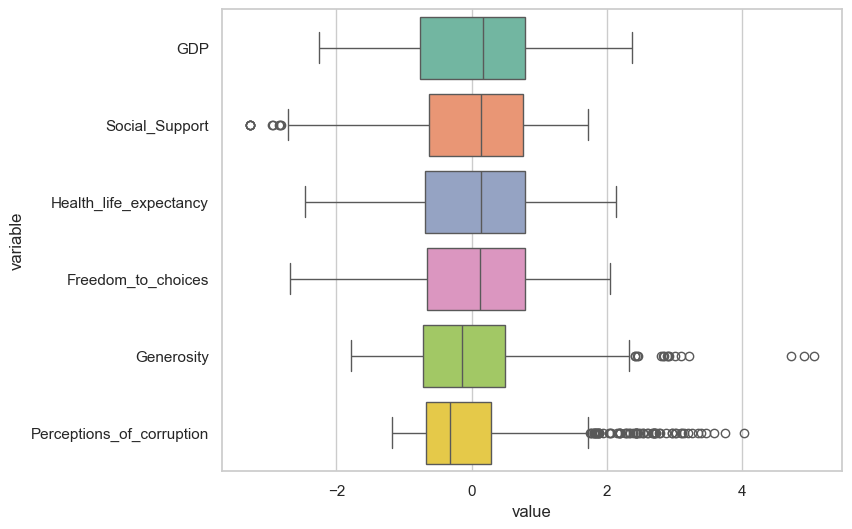

In [15]:
# Box-plot ile ülkelerin feature'lara göre dağılımı

df2 = pd.DataFrame( df_scaled, columns=features)
df2["Country"] = pd.Series ( df["Country"] , index=df.index)
df3 = pd.melt(df2, id_vars="Country", value_vars=df2[features])
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.boxplot(y= "variable", x="value", data=df3, palette="Set2")
plt.show()

In [16]:
# means ve std kontrolü

df2[features].describe().loc[["count", "mean", "std"]].round()

,GDP,Social_Support,Health_life_expectancy,Freedom_to_choices,Generosity,Perceptions_of_corruption
count,781.0,781.0,781.0,781.0,781.0,781.0
mean,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


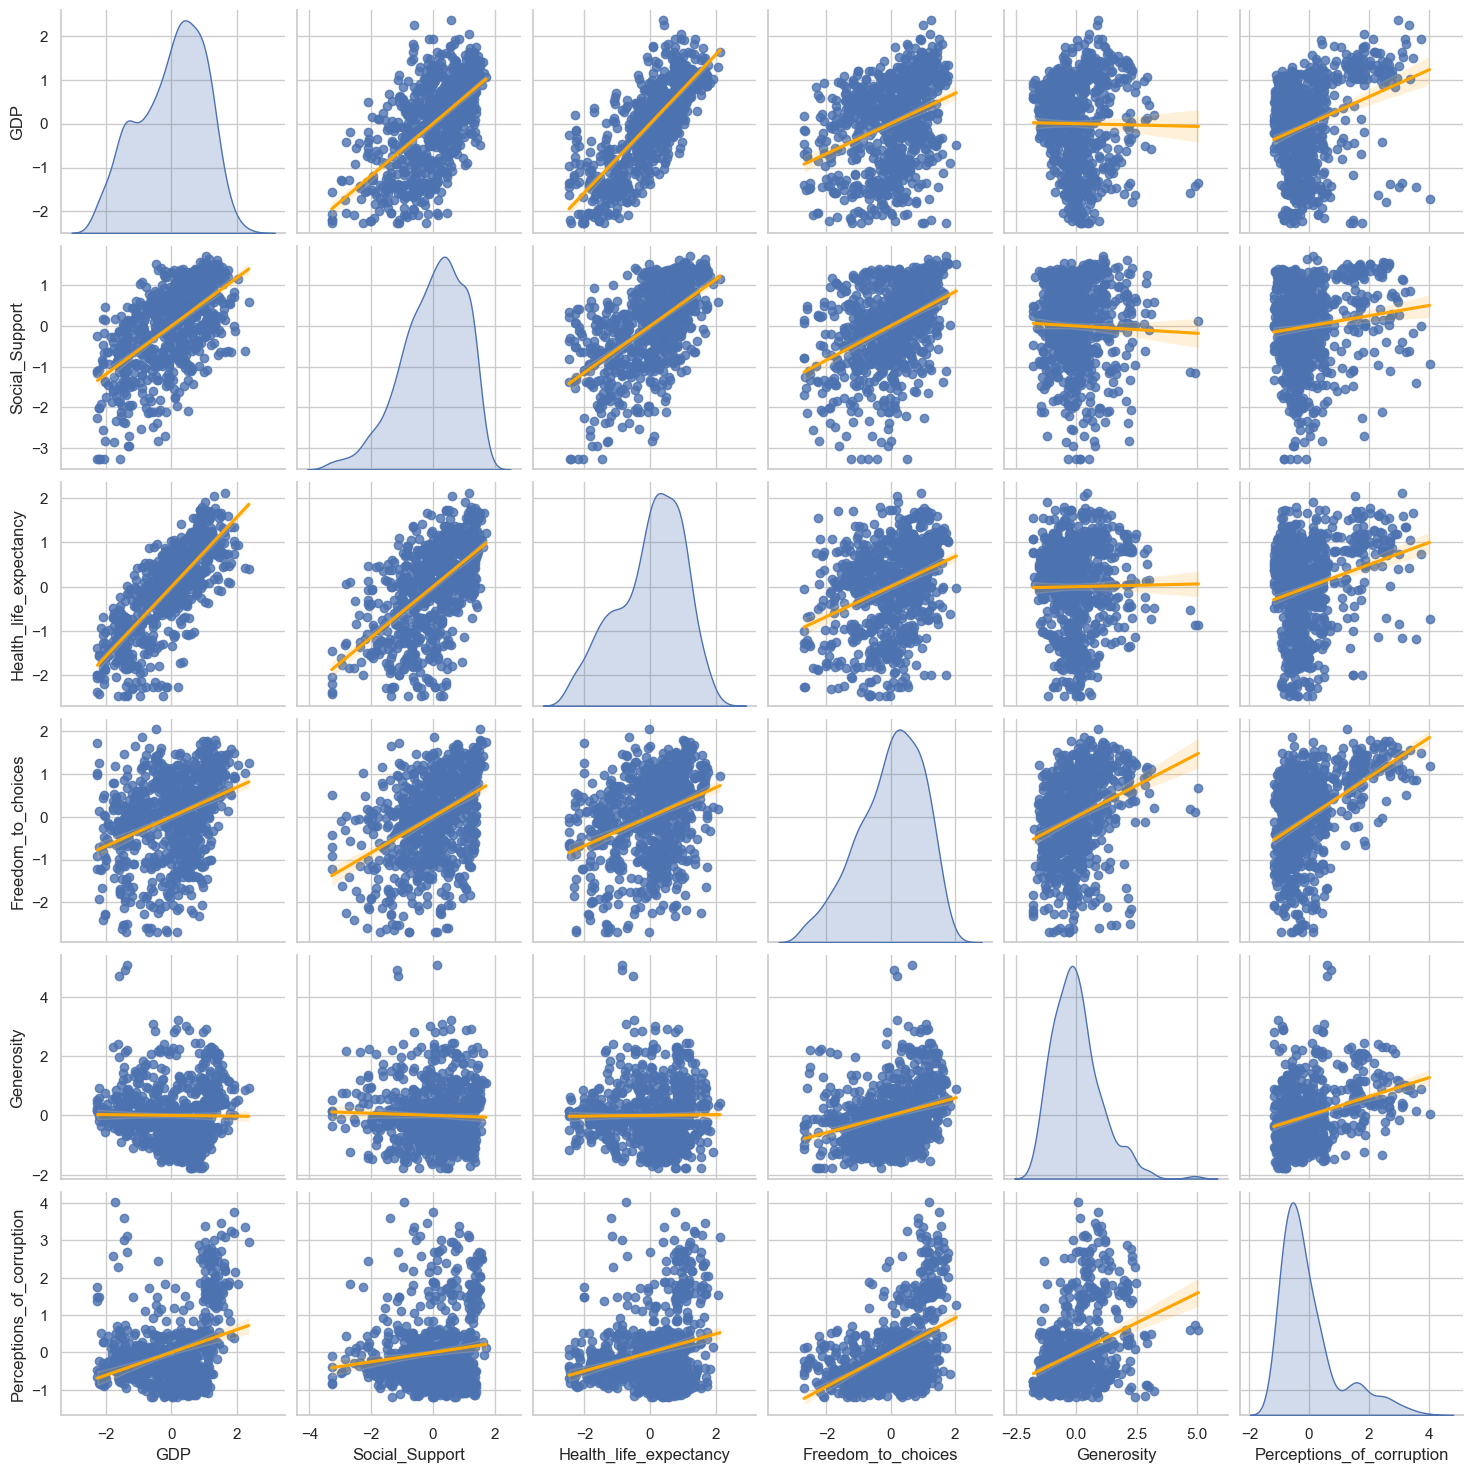

In [17]:
# feature'lar arası ilişkiyi scatter plot ile inceleme

sns.set(style="whitegrid")
sns.pairplot(df2[features], kind = "reg", diag_kind="kde", plot_kws={'line_kws':{'color':'orange'}})
plt.show()

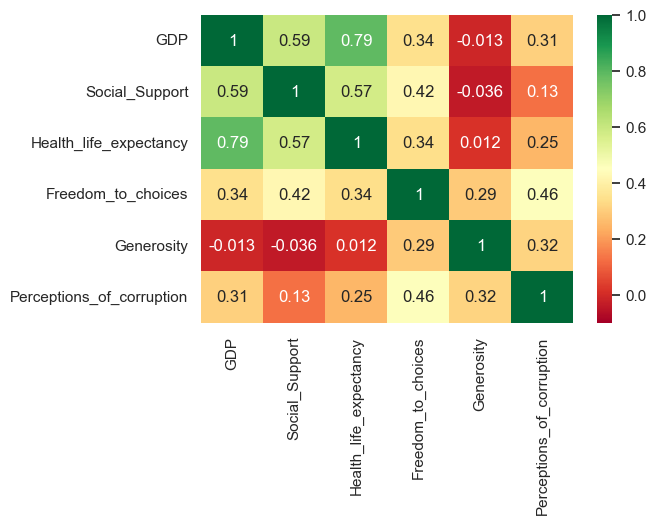

In [18]:
# degiskenler arasındaki korelasyon

plt.figure(figsize=(6,4))
sns.set(style="whitegrid")
sns.heatmap(df2[features].corr(method="pearson"), vmin=-.1, vmax=1, annot=True, cmap="RdYlGn")
plt.show()


## PCA hyperparameter

In [22]:
# pip install prince

  Using cached prince-0.13.0-py3-none-any.whl.metadata (638 bytes)
Using cached prince-0.13.0-py3-none-any.whl (415 kB)
Note: you may need to restart the kernel to use updated packages.


In [23]:
import prince
pca = prince.PCA(n_components=6, n_iter=10, rescale_with_mean=False,
rescale_with_std=False, copy=True, check_input=True,
engine= "sklearn" , random_state=42)

# PCA modeli için hiperporometrelere değerleri girelim:
#Zaten 6 bileşen vardı, hepsini dikkate alıyoruz. Normalde PCA böyle kullanılmaz ancak eğitim amacıyla yapıyoruz.

In [24]:
# PCA modelini pca variable a atayalım

pca = pca.fit(df2[features])

- PCA hiçbir feature ı dışlamadan dahil eder
- Çok sayıda feature overfitting e götürebilir

**NOT-2**:  Bu aşamada kümeleme açısından bizi ilgilendiren **PCA'nın hesapladığı temel bileşenlerden kaçının incelenen olayın çoğunu açıkladığıdır**. Yani, **hesaplanan temel bileşenlerden kaçı anlamlı kümeleme için yeterlidir?** Bunun için Temel bileşenlere ait elde edilen öz vektör değerleri (eigen values) ya da varyans grafiğinin bükülme noktasının solunda kalan temel bileşenler seçilir

In [25]:
#Modelin eigeanvalues değerleri

eigeanvalues = pca.eigenvalues_
print(eigeanvalues)

[2.75885528 1.39933142 0.65216266 0.62441317 0.35925595 0.20598152]


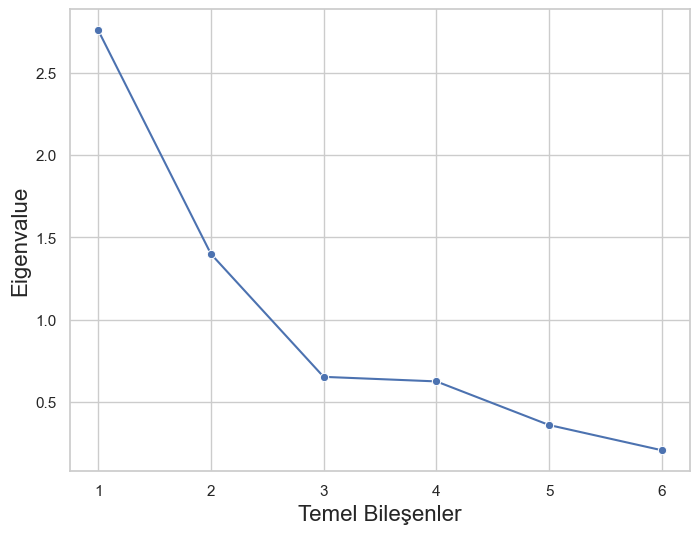

In [26]:
# Elbow metodu ile optimum temel bileşen sayısı seçimi

ev = pd.DataFrame()
ev["pca"] = range(1,7)
ev["eigenvalue"]=pd.DataFrame(pca.eigenvalues_)
plt.figure(figsize=(8,6))
sns.lineplot(x="pca", y = "eigenvalue", marker = "o", data= ev)
plt.ylabel("Eigenvalue", fontsize=16)
plt.xlabel("Temel Bileşenler", fontsize=16)
plt.show()

üstteki grafikte varyansın çoğunun ilk 3 bileşenle (component) açıklanabileceği görülüyor.

In [27]:
# AçıkLanan Varyans Oranları (kümülatif)
# Hangi temel bileşen incelenen olayı ne kadar açıklıyor? sorusunun cevabı

explained_variance=pca.cumulative_percentage_of_variance_
print(explained_variance)

[ 45.98092135  69.30311161  80.17248931  90.57937555  96.56697464
 100.        ]


yani 1. bileşen %45, 2.bileşen %(69-45) oranında açıklıyor 

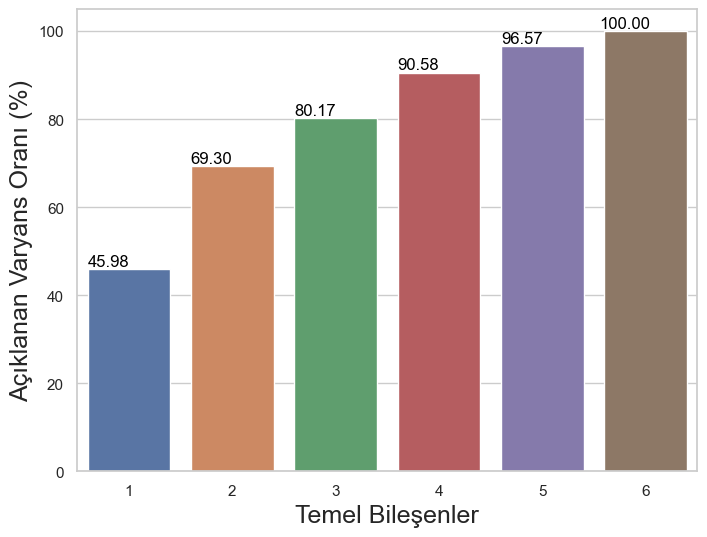

In [28]:
# avo: Açıklanan varyans oranı (kümülatif)
# Temel Kural: Kaç temel bileşen ile en az %80 varyans açıklanıyor?

avo = pd.DataFrame()
avo["pca"] = range(1,7)
avo["vari"] = pd.DataFrame(pca.cumulative_percentage_of_variance_)

plt.figure(figsize=(8,6))
graph = sns.barplot(x="pca", y ="vari", data=avo)

for p in graph.patches :
    graph.annotate('{:.2f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()), ha="center", va="bottom", color="black")

plt.ylabel("Açıklanan Varyans Oranı (%)", fontsize=18)
plt.xlabel("Temel Bileşenler", fontsize=18)
plt.show()  

Üstteki grafıkten de anlaşılacağı üzere 1 . Temel Bileşen toplam varyansın %46'sini, 1. ve 2. Temel Bileşen toplamda  %69'ünü ve 1-2-3. Temel Bileşen toplamları da  % 80'ini açıklamaktadır. 
Yani üçü birden hikayenin (varyansın) %80'ini açıklıyor. 
**Pratik bir kural olarak (rule of thumb) %80 ve üzeri açıklanan varyans eşik değer olarak kabul edilebilir**

**ÖNEMLİ**: Elbette şu soru akla gelebilir 6 feature'ı  3'e indirgeme için onca dönüştürme işlemini yapmaya değer mi? 
Cevap: 6 feature  için bunca zahmete değmeyebilir. Ama her aracın veri ürettiği günümüz dünyasında 1OO'lerce feature'dan oluşan veri setleri söz konusuysa gerçekten buna değer.

In [29]:
# Column (sütun) korelasyonu 

correlations = pca.column_correlations
correlations

component,0,1,2,3,4,5
variable,,,,,,
GDP,-0.849453,-0.290508,0.138698,0.240835,-0.073758,0.333700
Social_Support,-0.753313,-0.318772,-0.351864,-0.200843,0.406542,-0.038493
Health_life_expectancy,-0.833135,-0.297670,0.060866,0.291166,-0.198543,-0.298960
Freedom_to_choices,-0.676792,0.405925,-0.188871,-0.495832,-0.308085,0.027188
Generosity,-0.192159,0.787475,-0.388752,0.434315,0.053360,0.018787
Perceptions_of_corruption,-0.529828,0.582942,0.564457,-0.082562,0.226620,-0.051719


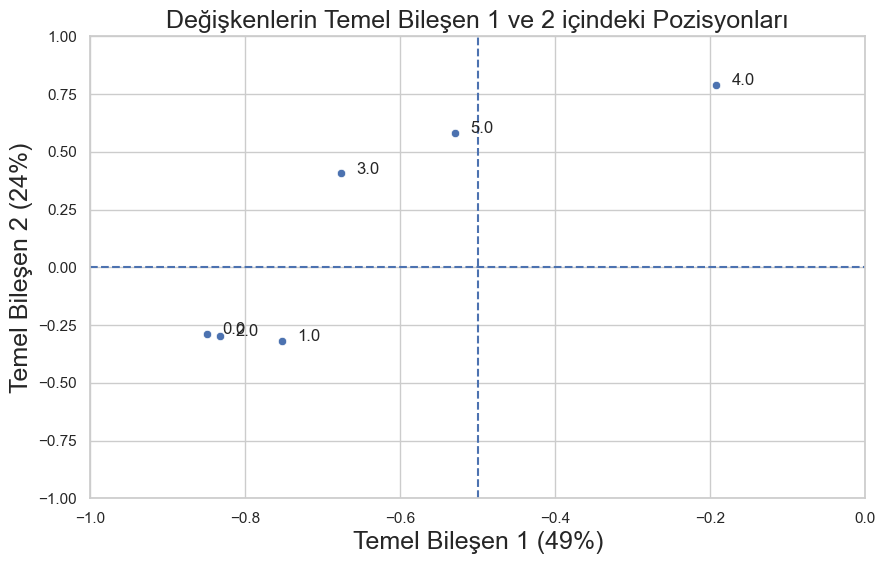

In [30]:
# Değişkenlerin Temel Bileşen 1 ve 2 içindeki Pozisyonları Grafiği 

scatter = pca.column_correlations.reset_index()

plt.figure(figsize=(10,6))

ax = sns.scatterplot(x=0, y=1, data=scatter)
ax.set(ylim=(-1,1), xlim=(-1,0))

def label_point(x, y, val, ax):
    a = pd.concat({"x": x, "y": y, "val": pd.Series(val)}, axis=1)  # scatter.index'i Series olarak kullan
    for i, point in a.iterrows():
        ax.text(point["x"]+.02, point["y"], str(point["val"]))

label_point(scatter[0], scatter[1], scatter.index, plt.gca())
plt.axvline(-0.5, ls="--")
plt.axhline(0, ls="--")
plt.title("Değişkenlerin Temel Bileşen 1 ve 2 içindeki Pozisyonları", fontsize=18)
plt.xlabel("Temel Bileşen 1 (49%)", fontsize=18)
plt.ylabel("Temel Bileşen 2 (24%)", fontsize=18)
plt.show()

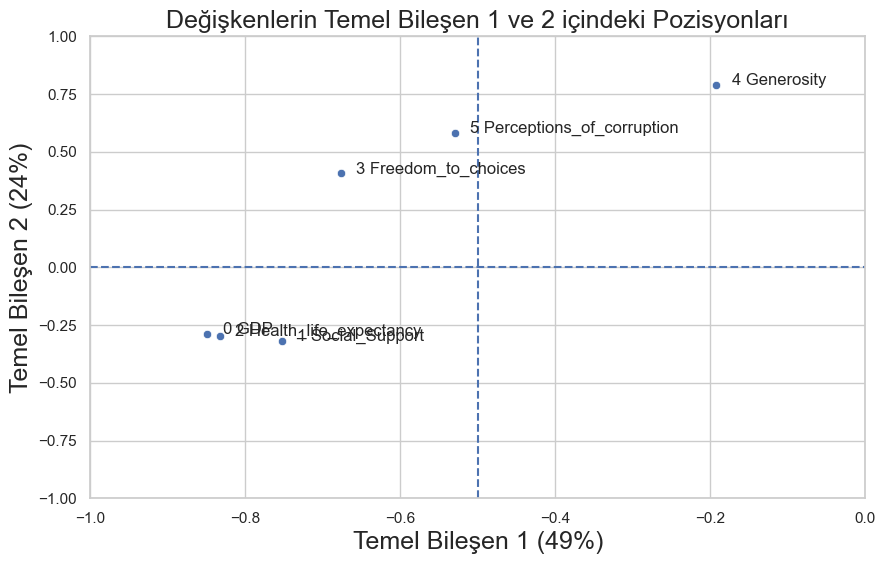

In [31]:
# Değişkenlerin Temel Bileşen 1 ve 2 içindeki Pozisyonları Grafiği
scatter = pca.column_correlations.reset_index()


plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=0, y=1, data=scatter)
ax.set(ylim=(-1,1), xlim=(-1,0))
def label_point(x, y, val,lab, ax):
    a = pd.concat({"x": x, "y": y, "val": pd.Series(val),"a":lab}, axis=1)  # scatter.index'i Series olarak kullan
    for i, point in a.iterrows():
        ax.text(point["x"]+.02, point["y"], f'{str(point["val"])} {str(point["a"])}' )
label_point(scatter[0], scatter[1], scatter.index, scatter.variable,plt.gca())
plt.axvline(-0.5, ls="--")
plt.axhline(0, ls="--")
plt.title("Değişkenlerin Temel Bileşen 1 ve 2 içindeki Pozisyonları", fontsize=18)
plt.xlabel("Temel Bileşen 1 (49%)", fontsize=18)
plt.ylabel("Temel Bileşen 2 (24%)", fontsize=18)
plt.show()

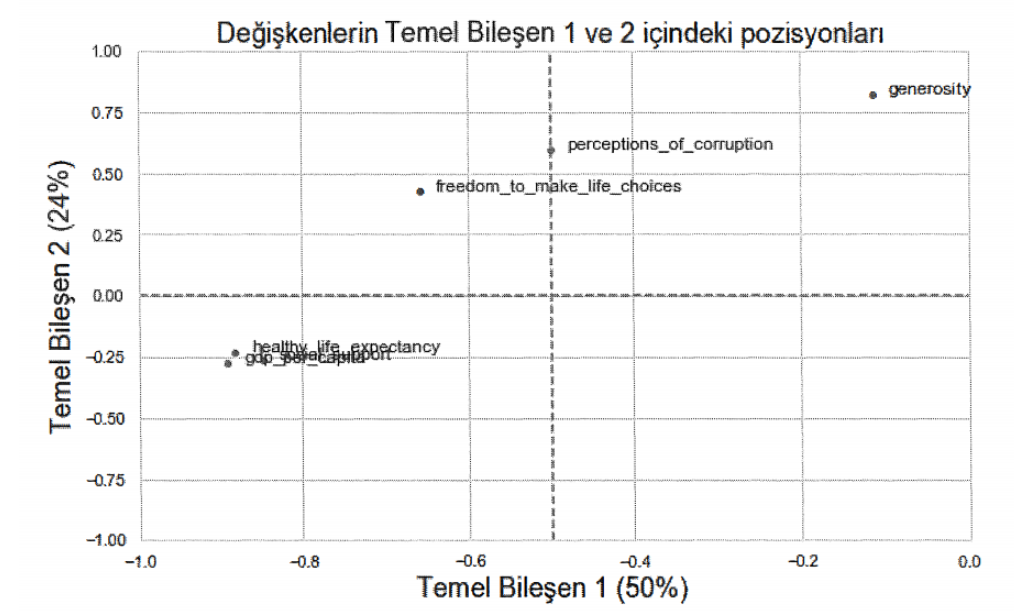

**NOT**: Üstteki grafik, hangi feature'ların birbirine yakın olduğunu (featıure'lar arası gruplaşmaları) göstermesi bakımından oldukça faydalı bir yaklaşım. İlk iki temel bileşene dayalı üç değişken grup olduğu görülüyor: i) GSYİH-GDP, sosyal destek-Social Support ve sağlıklı yaşam beklentisi-Healty life exp, ii) (üst grafikte 3.0 ve 5.0 noktası)yaşam seçimleri yapma özgürlüğü-Freedom  to make ve yolsuzluk algısı-Perception ve iii) cömertlik-Generosity (grafikte 4.0 noktası).

## Cluster Prediction

In [32]:
# ülkelerin ait olduğu kümeleri tahmin edelim

# 1. ve 2. biLeşen çiftine göre hümeLeme tahmini

x_pca = pca.transform(df2[features])
x_pca.head()

component,0,1,2,3,4,5
0,-3.288539,1.521011,1.196249,-0.343118,0.226529,-0.255045
1,-2.445729,0.902356,-1.244080,0.607152,-0.418476,-0.126588
2,-3.268610,2.121851,1.406908,-0.299633,0.676998,-0.274341
3,-3.119707,1.580386,0.664560,-0.102444,0.069617,0.088780
4,-2.862612,1.240375,1.422209,-0.654648,0.275983,-0.327535


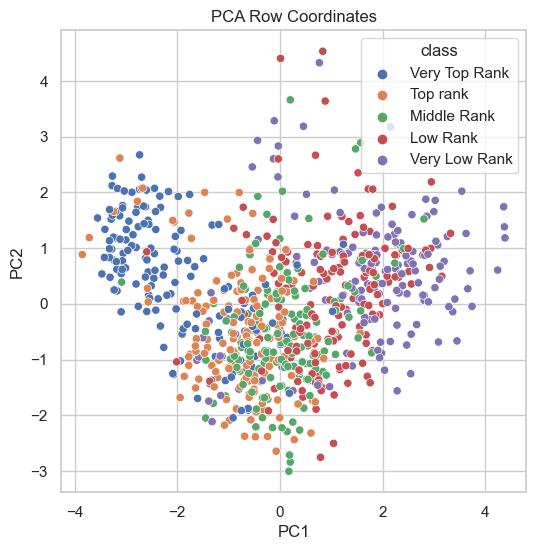

In [33]:
# Ulkelerin 5 kumeye (classes) ayrılmış görüntüsünü elde etme 
row_coords = pca.row_coordinates(df2[features])

plt.figure(figsize=(6,6))
ax = sns.scatterplot(
    x=row_coords.iloc[:, 0],  
    y=row_coords.iloc[:, 1],  
    hue=df["class"]           
)

ax.set_title("PCA Row Coordinates")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [34]:
# Farklı bileşen çiftlerine göre kümeleme tahminleri

pd.DataFrame.iteritems = pd.DataFrame.items
import plotly.express as px
from plotly.offline import plot
components = pca.fit_transform(df2[features])
labels = {str(i): f"PC {i+1} ({var:.1f}%)"
          for i, var in enumerate(pca.cumulative_percentage_of_variance_)}
fig = px.scatter_matrix(components, labels=labels, dimensions=range(4),
                        color=df["class"])
fig.update_traces(diagonal_visible=False)
plot(fig)

'temp-plot.html'

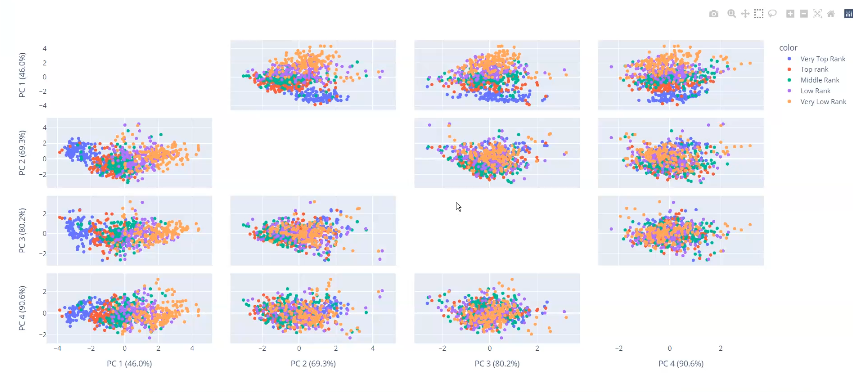

**Üstteki kodlarla açılan web sayfasında**: 

Plotly Express kütüphanesinin görselleştirme aracı varyans ratio 'su düşük olan temel bileşenleri dikkate almıyor. Temel bileşenleri en büyükten en küçüğe sıralayıp toplam varyansı %90'a ulaştıran temel bileşenleri dikkate alıyor. 

Bu görsel aracın bir faydası da interaktif olması: Herhangi bir veri noktasına (Bu uygulamada ülkeler gözlem ya da veri noktalarını oluşturuyor.) fareyle dokunulduğunda ilgili temel bileşen çifti içindeki koordinatının değerlerini, ülkenin gurubunu öğrenme imkanı verilmektedir.

## 3D Visualization - 3 Temel Bileşen ile Kümeleme

In [30]:
from mpl_toolkits.mplot3d import Axes3D

In [31]:
# 3 Temel Bileşen ile Kümeleme

# df['cLass'] içindeki kategorik terimleri sayılara dönüştürelim

df ["nclass"] = df["class"].cat.codes
df["nclass"].unique()


# Veri noktalarının temel bileşenlerle koordinatlarını alarak bir motris oluşturalım
x_pca=pca.transform(df2[features]).to_numpy()
x_pca


# NOT: Axes3D numpay array formatında çalıştığından Pandas dataframe olarak formatlanan matrisi //
# // ".to_numpy() fonksiyonu ile numpay array formatına dönüştürdük. Eğer bunu eklemeseydik //
# // x_pca matrisi dataframe formatında kaydedilecekti ve 3D grafık bu formatı algılamayacağından grafiği oluşturamayacaktı.

array([[-3.28853863,  1.5210113 ,  1.19624908, -0.34311781,  0.22652872,
        -0.25504468],
       [-2.44572929,  0.90235623, -1.24407988,  0.60715218, -0.41847557,
        -0.12658762],
       [-3.26861024,  2.12185133,  1.40690846, -0.29963332,  0.67699797,
        -0.27434064],
       ...,
       [ 3.29228399, -0.04986696,  0.76552954,  1.06516293,  0.78519035,
        -0.25904117],
       [ 1.64052549, -0.33799056,  0.46180151, -1.29685418,  1.25230116,
         1.32142685],
       [-1.16339935, -0.93605361, -0.61102417,  0.86788421,  0.20820568,
         0.44390604]])

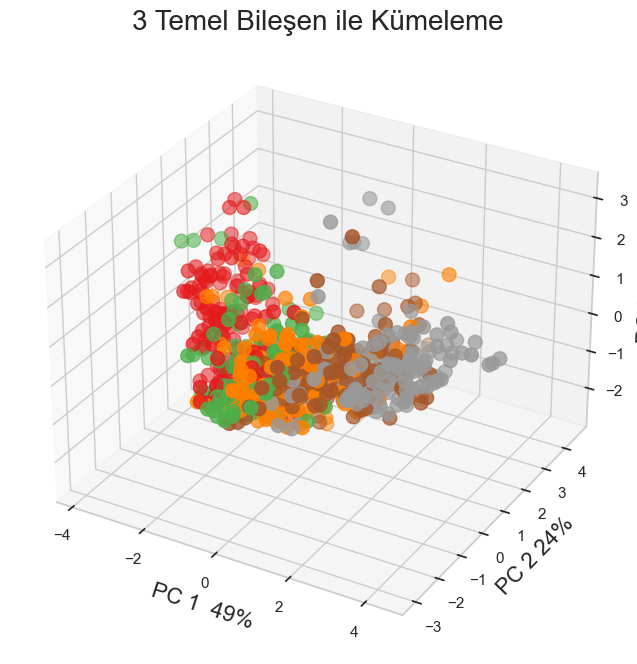

In [32]:
# Grafiği çizelim

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')  


ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=df["nclass"], s=100, cmap="Set1")

ax.set_title("3 Temel Bileşen ile Kümeleme", fontsize=20)
ax.set_xlabel("PC 1  49%", fontsize=16)
ax.set_ylabel("PC 2 24%", fontsize=16)
ax.set_zlabel("PC 3 11%", fontsize=16)

plt.show()

Görsel, veri setindeki örnekleri üç ana temel bileşen (PC1, PC2, PC3) açısından gösteriyor ve her bir nokta veri setindeki bir gözlemi (örneğin, bir ülke veya durumu) temsil ediyor. PCA, çok boyutlu verilerin boyutunu indirgemek ve veri setindeki en önemli varyansı yakalamak için kullanılır.

In [ ]:
# Featureların herbir temel bileşen içinde açıklanan varyansa yaptığı katkıyı //
## // Eigenvedtors leri tablo hali,ne getirerek inceleyelim

t = pd.concat([pca.column_correlations, df2[features]], axis=1)
t = t.transpose()
features_names = pd.Series(t.columns)
s = pd.Series(["PCA1", "PC2", "PC3", "PC4", "PC5", "PC6"])

# 's' Serisini 't' DataFrame'ine yeni bir sütun olarak ekleyin
t["PC_Label"] = s

# 'PC_Label' sütununu indeks olarak ayarlayın
t = t.set_index("PC_Label")

#Grafiği hazır hale getirmek için t dataframe i array e dönüştürelim ve yuvarlayalım
t = t.to_numpy()
t = t.round(2)

In [ ]:
Bundan sonraki HEatmap gösterimi olan NB d,ğer dosyadadır...